# Resolução de Exercício de Avaliação 

Este notebook contém a resolução de três questões usando métodos numéricos em Python, abordando os seguintes tópicos:

1. Método de Euler e Runge-Kutta de 3ª ordem.
2. Movimento de um projétil com resistência do ar.
3. Crescimento populacional usando a equação logística.

## Importação de Bibliotecas

In [67]:
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

### Questão 1: Método de Euler e Runge-Kutta de 3ª Ordem
Calcular o valor de y(1) usando os métodos de Euler e Runge-Kutta de 3ª ordem.
E calcular o erro absoluto erro absoluto cometido na aproximação de y (1) usando os dois métodos. 


#### Código para Métodos de Euler e Runge-Kutta

In [68]:
# Definindo a função diferencial de acordo com o PVI
def f(x, y):
    return (y**2 - 2*x) / y

In [69]:
# Método de Euler
def euler_method(f, x0, y0, h, n):
    x, y = x0, y0
    results = []
    for i in range(n):
        y += h * f(x, y)
        x += h  
        results.append([i+1, x, y])  # Guarda os valores de n, xn, yn
    return results

In [70]:
# Método de Runge-Kutta de 3ª ordem
def runge_kutta_3rd_order(f, x0, y0, h, n):
    x, y = x0, y0
    results = []
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h, y - k1 + 2 * k2)
        y += (k1 + 4 * k2 + k3) / 6
        x += h
        results.append([i+1, x, k1, k2, k3, y])
    return results


In [91]:
#função exata 
def y_exact(x):
    return math.sqrt(2 * x + 1)

In [101]:
# Função para plotar o grafico de comparação 
def plot_numeric_vs_exact(results, y_exact, filename, col_x, col_y):
    x_values = [row[col_x] for row in results]  # Valores de x
    y_numeric_values = [row[col_y] for row in results]  # Valores de y aproximados 
    y_exact_values = [y_exact(x) for x in x_values]  # Valores de y exatos

    # Plot das soluções
    plt.plot(x_values, y_numeric_values, label="Solução Numérica", marker='o', linestyle='--', color='blue', linewidth=2, alpha=0.8)
    plt.plot(x_values, y_exact_values, label="Solução Exata", marker='x', linestyle='-', color='red', linewidth=2.5, alpha=0.8)

    # Configurações do gráfico
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Salva o gráfico em um arquivo
    plt.savefig(filename)
    print(f"Gráfico salvo como '{filename}'")
    plt.show()


In [93]:
# Parâmetros iniciais
x0 = 0
y0 = 1
h = 0.2
x_final = 1
n = int((x_final - x0) / h)

In [74]:
# Solução usando Método de Euler
results = euler_method(f, x0, y0, h, n)

In [100]:
#Adicionando o y exato e o erro na tabela
for row in results:
    xn = row[1]
    yn = row[2]
    y_exact_value = y_exact(xn)  # Calcula o valor exato de y para o xn
    erro = abs(y_exact_value - yn)  # Calcula o erro
    row.append(y_exact_value)  # Adiciona o y_exact na tabela
    row.append(erro)  # Adiciona o erro na tabela

In [76]:
#printa tabela
print(tabulate(results, headers=["n", "xn", "yn", "y_exact", "erro"], tablefmt="fancy_grid"))

╒═════╤══════╤═════════╤═══════════╤═══════════╕
│   n │   xn │      yn │   y_exact │      erro │
╞═════╪══════╪═════════╪═══════════╪═══════════╡
│   1 │  0.2 │ 1.2     │   1.18322 │ 0.016784  │
├─────┼──────┼─────────┼───────────┼───────────┤
│   2 │  0.4 │ 1.37333 │   1.34164 │ 0.0316925 │
├─────┼──────┼─────────┼───────────┼───────────┤
│   3 │  0.6 │ 1.5315  │   1.48324 │ 0.0482554 │
├─────┼──────┼─────────┼───────────┼───────────┤
│   4 │  0.8 │ 1.68108 │   1.61245 │ 0.068633  │
├─────┼──────┼─────────┼───────────┼───────────┤
│   5 │  1   │ 1.82695 │   1.73205 │ 0.0948974 │
╘═════╧══════╧═════════╧═══════════╧═══════════╛


Gráfico salvo como 'euler_grafico.png'


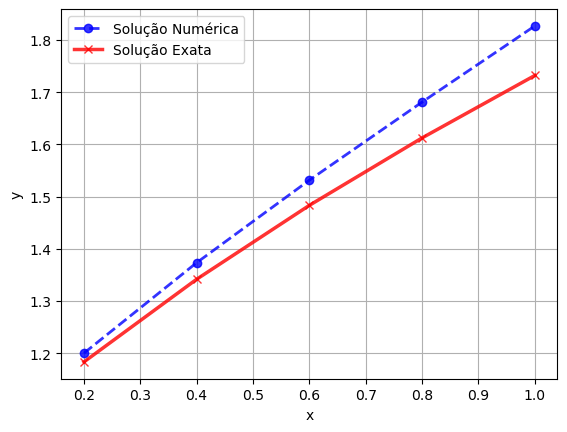

In [77]:
#plota grafico
plot_numeric_vs_exact(results, y_exact, "euler_grafico.png", 1, 2)

In [102]:
# Solução usando Runge-Kutta de 3ª ordem
results = runge_kutta_3rd_order(f, x0, y0, h, n)

In [103]:
for row in results:
    xn = row[1]
    yn = row[5]
    y_exact_value = y_exact(xn)  # Calcula o valor exato de y para o xn
    erro = abs(y_exact_value - yn)  # Calcula o erro
    row.append(y_exact_value)  # Adiciona o y_exact na tabela
    row.append(erro)  # Adiciona o erro na tabela

In [104]:
#printa tabela
print(tabulate(results, headers=["n", "xn", "k1", "k2", "k3", "yn", "y_exact", "erro"], tablefmt="fancy_grid"))

╒═════╤══════╤══════════╤══════════╤══════════╤═════════╤═══════════╤═════════════╕
│   n │   xn │       k1 │       k2 │       k3 │      yn │   y_exact │        erro │
╞═════╪══════╪══════════╪══════════╪══════════╪═════════╪═══════════╪═════════════╡
│   1 │  0.2 │ 0.2      │ 0.183636 │ 0.164919 │ 1.18324 │   1.18322 │ 2.80725e-05 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   2 │  0.4 │ 0.169038 │ 0.158898 │ 0.14628  │ 1.34173 │   1.34164 │ 8.81012e-05 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   3 │  0.6 │ 0.149097 │ 0.14204  │ 0.132819 │ 1.48341 │   1.48324 │ 0.000168622 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   4 │  0.8 │ 0.134892 │ 0.129625 │ 0.122519 │ 1.61273 │   1.61245 │ 0.000275518 │
├─────┼──────┼──────────┼──────────┼──────────┼─────────┼───────────┼─────────────┤
│   5 │  1   │ 0.124124 │ 0.120005 │ 0.114324 │ 1.73247 │   1.73205 │ 0.0004

Gráfico salvo como 'hk3_grafico.png'


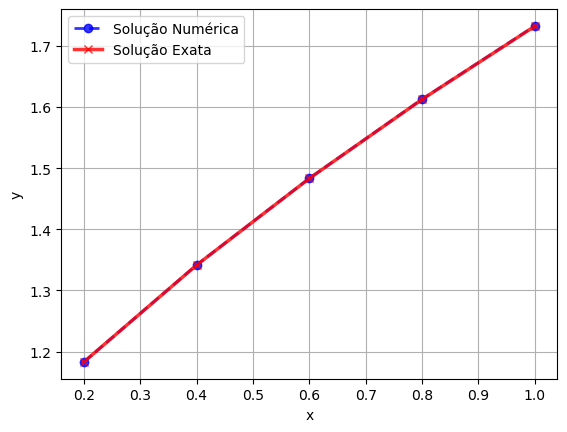

In [105]:
#plota grafico
plot_numeric_vs_exact(results, y_exact, "hk3_grafico.png", 1, 5)

### Questão 2: Movimento de um projétil
Calcular a velocidade de um projétil considerando a resistência do ar e encontrar o tempo no qual o projétil começa a cair.

#### Código para Simulação do Movimento

In [83]:
def projectile_velocity(m, g, k, v0, dt, t_final):
    t = 0
    v = v0
    while t <= t_final:
        # dv é calculado de acordo com a equação diferencial dada
        dv = (g - (k/m) * v * abs(v)) * dt
        v += dv ## DÚVIDA SE É PRA SOMAR OU SUBTRAIR
        t += dt
        print(f"Tempo: {t:.1f} s, Velocidade: {v:.4f} m/s")
        if v <= 0: ## DÚVIDA SE É < OU <=
            print(f"O projétil começa a cair após {t:.2f} segundos.")
            break

In [84]:
# Parâmetros
m = 0.11  # massa do projétil em kg
g = -9.8  # aceleração da gravidade em m/s^2
k = 0.002  # coeficiente de resistência do ar em kg/m
v0 = 8  # velocidade inicial em m/s
dt = 0.1  # intervalo de tempo em segundos
t_final = 1  # tempo final em segundos

projectile_velocity(m, g, k, v0, dt, t_final)

Tempo: 0.1 s, Velocidade: 6.9036 m/s
Tempo: 0.2 s, Velocidade: 5.8370 m/s
Tempo: 0.3 s, Velocidade: 4.7950 m/s
Tempo: 0.4 s, Velocidade: 3.7732 m/s
Tempo: 0.5 s, Velocidade: 2.7673 m/s
Tempo: 0.6 s, Velocidade: 1.7734 m/s
Tempo: 0.7 s, Velocidade: 0.7877 m/s
Tempo: 0.8 s, Velocidade: -0.1934 m/s
O projétil começa a cair após 0.80 segundos.


### Questão 3: Crescimento Populacional
Calcular a população estimada depois de 5 anos utilizando Runge-Kutta de ordem 4.

#### Código para Métodos de Runge-Kutta

In [85]:
# Definindo a função f(t, P) que representa a taxa de variação dP/dt
def dP_dt(P, b, k):
    return b * P - k * P**2

In [86]:
# Método de Runge-Kutta de quarta ordem
def runge_kutta_4(P0, b, k, t_final, h, n):
    t = 0
    P = P0
    results = []
    for i in range(n):
        # Coeficientes de Runge-Kutta
        k1 = h * dP_dt(P, b, k)
        k2 = h * dP_dt(P + 0.5 * k1, b, k)
        k3 = h * dP_dt(P + 0.5 * k2, b, k)
        k4 = h * dP_dt(P + k3, b, k)
        
        # Atualiza a população
        P += (k1 + 2*k2 + 2*k3 + k4) / 6

        # Atualiza o tempo
        t += h
        
        results.append([i+1, t, k1, k2, k3, k4, P])
    
    return results

In [87]:
def plot_numeric(results, filename, col_x, col_y):
    x_values = [row[col_x] for row in results]  # Valores de x
    y_numeric_values = [row[col_y] for row in results]  # Valores de y aproximados 
    # Plot das soluções
    plt.plot(x_values, y_numeric_values, label="Solução Numérica", marker='o', linestyle='--', color='blue', linewidth=2, alpha=0.8)

    # Configurações do gráfico
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # Salva o gráfico em um arquivo
    plt.savefig(filename)
    print(f"Gráfico salvo como '{filename}'")
    plt.show()

In [88]:
# Parâmetros
P0 = 50976  # População inicial
b = 2.9e-2  # Taxa de nascimentos
k = 1.4e-7  # Constante de mortalidade proporcional
t_final = 5  # Tempo final em anos
h = 1  # Passo de tempo
n = 5

In [89]:
# Calculando a população estimada após 5 anos
results = runge_kutta_4(P0, b, k, t_final, h, n)
print(tabulate(results, headers=["n", "xn", "k1", "k2", "k3", "k4", "yn"], tablefmt="fancy_grid"))

╒═════╤══════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│   n │   xn │      k1 │      k2 │      k3 │      k4 │      yn │
╞═════╪══════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│   1 │    1 │ 1114.51 │ 1122.67 │ 1122.73 │ 1130.86 │ 52098.7 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   2 │    2 │ 1130.86 │ 1138.97 │ 1139.03 │ 1147.1  │ 53237.7 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   3 │    3 │ 1147.1  │ 1155.13 │ 1155.19 │ 1163.19 │ 54392.8 │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   4 │    4 │ 1163.19 │ 1171.15 │ 1171.21 │ 1179.13 │ 55564   │
├─────┼──────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   5 │    5 │ 1179.13 │ 1187    │ 1187.05 │ 1194.89 │ 56751   │
╘═════╧══════╧═════════╧═════════╧═════════╧═════════╧═════════╛


Gráfico salvo como 'rk4_grafico.png'


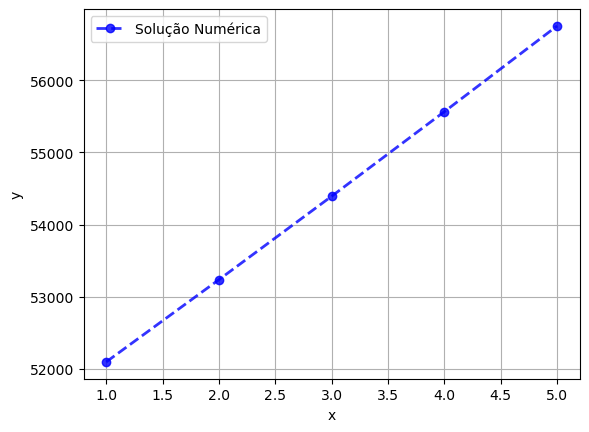

In [90]:
plot_numeric(results, "rk4_grafico.png", 1, 6)